In [34]:
#всегдашний зачин
import sympy
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy.abc import x,y
from sympy import *
init_printing( use_latex='mathjax' )
phi=symbols("\p")
g = Function("g")
h = Function("h")
f = Function("f")
er = symbols("er")
x=symbols("x")
y=symbols("y")
a=symbols("a")
b=symbols("b")

Уравнение окружности $x^2+y^2=R^2$

Пусть нам дается n точек 

## 0.Подготовка : cоздание случайного набора точек, принадлежащих случайной окружности, небольшая возня с графиками

Пусть существует некоторая окружность со случайным центром $c$ и радиусом $r$

Пусть координаты центра - случайные от 0 до 100

In [24]:
c=np.random.uniform(low=0,high=100,size=2)
center = Matrix(c)
center

⎡60.5337503243274⎤
⎢                ⎥
⎣23.733145021089 ⎦

Пусть радиус случайный от 0 до 100

In [25]:
r=np.random.uniform(low=0,high=100)
r

70.22714303527674

Таким образом получаем окружность $(x-x_c)^2+(y-y_c)^2=r^2$

Нарисуем ее :

(-56.49399801418775, 103.96028805636573)

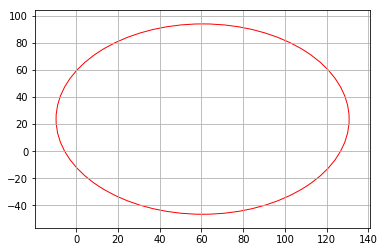

In [26]:
ax=plt.gca()
circle1 = plt.Circle((c[0], c[1]), r, color='r', fill=false)
ax.add_patch(circle1)
plt.grid()
plt.xlim(c[0]-10-r,c[0]+r+10)
plt.ylim(c[1]-10-r,c[1]+r+10)

Теперь выберем n точек на окружности случайным выбором угла

In [27]:
n=10

In [28]:
angels_of_random_points=np.random.uniform(0,2*np.pi,size=n)
angels_of_random_points

array([0.2743951 , 0.10693047, 4.5804119 , 2.782778  , 5.27931733,
       4.30238845, 3.51437149, 0.76727543, 2.14686602, 5.58215574])

In [29]:
X=[]
Y=[]
for i in range(0,10):
    X.append(r*np.cos(angels_of_random_points[i])+c[0])
    Y.append(r*np.sin(angels_of_random_points[i])+c[1])

In [30]:
X,Y

([128.13364546637416, 130.35978279371224, 51.29225946076062, -5.22088814099796
4, 98.24877997181434, 32.54052160085192, -4.870113611703339, 111.0835760889973
2, 22.278767447028848, 114.19982411680778], [42.762222657209655, 31.2282639982
39385, -45.88327879912623, 48.39443329221476, -35.50728169569288, -40.67361521
828653, -1.8439189451755844, 72.4831884473131, 82.62633566274815, -21.56369971
0053996])

Отобразим теперь все это хозяйство на графике

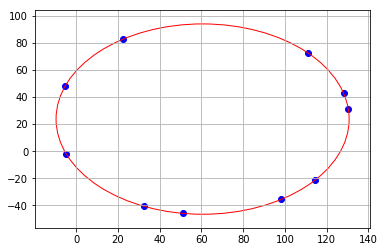

In [31]:
ax=plt.gca()
circle1 = plt.Circle((c[0], c[1]), r, color='r', fill=false)
ax.add_patch(circle1)
plt.grid()
plt.xlim(c[0]-10-r,c[0]+r+10)
plt.ylim(c[1]-10-r,c[1]+r+10)
plt.scatter(X,Y,c='b')

Пошевелим немного точки - каждая получит погрешность в пределах er по $x$ и $y$

In [37]:
er=10

In [38]:
X=np.array(X)
Y=np.array(Y)

In [39]:
X_er=np.random.uniform(0,er,size=n)
Y_er=np.random.uniform(0,er,size=n)
X=X+X_er
Y=Y+Y_er

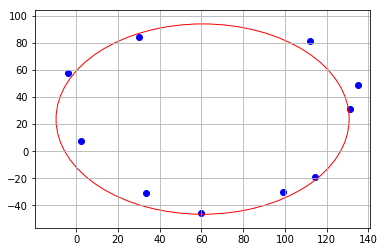

In [40]:
ax=plt.gca()
circle1 = plt.Circle((c[0], c[1]), r, color='r', fill=false)
ax.add_patch(circle1)
plt.grid()
plt.xlim(c[0]-10-r,c[0]+r+10)
plt.ylim(c[1]-10-r,c[1]+r+10)
plt.scatter(X,Y,c='b')

## 1.Построение окружности по точкам при помощи МНК

### 1.1 Поиск центра

Нам дан набор абсцисс и ординта случайных точек :

In [41]:
X=np.array(X)
X

array([135.23927809, 131.23881037,  59.82641732,  -3.89758959,
        99.23232691,  33.44399435,   2.13163768, 111.76771778,
        30.02938478, 114.28258957])

In [42]:
Y=np.array(Y)
Y

array([ 49.12076644,  31.48953301, -45.87676686,  58.02817297,
       -29.93735032, -31.12086218,   7.75139564,  81.71823413,
        83.9608241 , -19.31091667])

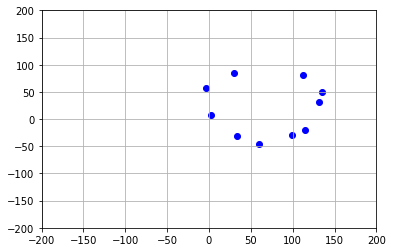

In [43]:
ax=plt.gca()
plt.grid()
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.scatter(X,Y,c='b')

Постараемся найти окружность, описывающую нашу точку

Центр будем искать минимизируя среднеквадратичное расстояние

Нам нужно найти вектор $X$, минимизирующий следующее выражение :

$\sqrt{(x-x_1)^2+(x-x_2)^2+..+(x-x_n)^2}$, где $x_i -i$-я точка нашего набора

Для этого достаточно минимизировать подкоренное выражение :

$(x-x_1)^2+(x-x_2)^2+..+(x-x_n)^2$

данное выражение минимизируется покоординатным средневзвешенным :

$2(z-z_1)+2(z-z_2)+...2(z-z_n)=0\\2(y-y_1)+2(y-y_2)+...2(y-y_n)=0$

$nz=z_1+...+z_n$

Значит решение это средневзвешенное всех координат :

In [44]:
X.mean()

71.3294567265783

In [45]:
Y.mean()

18.582303027686585

Исходный центр :

In [46]:
center

⎡60.5337503243274⎤
⎢                ⎥
⎣23.733145021089 ⎦

### 1.2 Поиск радиуса

Радиус найдем как средневзвешенное расстояний точек от центра

Рассмотрим набор чисел $d_i$, где $d_i$ - расстояние от $i$-й точки до нашего центра

Наши точки :

In [47]:
X

array([135.23927809, 131.23881037,  59.82641732,  -3.89758959,
        99.23232691,  33.44399435,   2.13163768, 111.76771778,
        30.02938478, 114.28258957])

In [49]:
l=[]
for i in range(0,n):
    l.append(((X[i]-center[0])**2+(Y[i]-center[1])**2)**(1/2))

In [50]:
l

[78.9015031587294, 71.1292279631252, 69.6135055243523, 72.9900438789535, 66.16
72267801186, 61.1785663800624, 60.5493441268156, 77.3769344254995, 67.51214442
82548, 68.8602132419303]

Теперь найдем среднее квадратичное :

$s=\sqrt{\frac{l_1^2+l_2^2+...+l_n^2}{n}}$

In [55]:
summ = 0
for i in range(0,n):
    summ+=l[i]**2
s=(summ/n)**(1/2)

Наш итог это число

In [56]:
s

69.6651645232898

Исходный радиус был

In [57]:
r

70.22714303527674

Рассмотрим получившуюся окружность

<function matplotlib.pyplot.show(*args, **kw)>

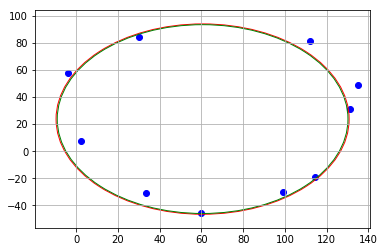

In [58]:
ax=plt.gca()
circle1 = plt.Circle((c[0], c[1]), r, color='r', fill=false)
circle2 = plt.Circle((center[0],center[1]),s, color ='g', fill=false)
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.grid()
plt.xlim(c[0]-10-r,c[0]+r+10)
plt.ylim(c[1]-10-r,c[1]+r+10)
plt.scatter(X,Y,c='b')
plt.show

Вариант оптимизации из головы : 
Когда мало точек, может сложиться ситуация когда в одной четверти/полуплоскости собирается подавляющее число точек. Тогда нужно более умно выбирать центр : если мы видим что точки скапливаются в верхней полуплоскости, то можно попытаться приблизить их верхней крышкой окружности.

Это можно сделать следующий образом : сделать перенос координат и поворот плоскости так, чтобы все точки которые находятся в одной полуплоскости встали в положительную полуплоскость. Затем их приблизить функцией $y=\sqrt{x^2-r^2}$